#### HW1 pt.1: 6 coding tasks

* For each task you can get either max or 0 points.

* If you use any sources to solve the HW, you must cite them. 

* No plagiarism accepted, cheating will be penalised

* You must be able to explain your solution (to defend yourself if you are suspected of cheating)

In [1]:
# imports
import numpy as np
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

#### Task 1. Favorite sorting algo (5 points)
Write a function that takes an 1xN array of numbers and return its sorted version. Use of built-in sort function is prohibited. Compare correctness and the speed of your solution with the numpy's sort() method. 

Note: Use loop, if/else


In [ ]:
def my_sorting_function(arr):

    """
    This function sort given array in ascending order

    Parameters
    ----------

    array: array of numbers, e.g. [1.3, 5.2, 3.5, -7.1, 7]

    Returns
    ----------
    sorted in ascending order array
    """

    n = len(arr)

    # Note: change arr in place, i.e. using slicing/indexing
    
    ### your code here ###

    return arr


# create array
arr = np.arange(500)

# randomly shuffle array
np.random.shuffle(arr)

# sort the array using your function
sorted_array = my_sorting_function(arr.copy())

 # distance between sorted arrays should be zero. If no error raised you passed this task
assert abs(sorted_array - np.sort(arr)).sum() == 0


In [56]:
# compare the speed of your solution with np.sort

#### Task 2. Nearest neighbor (5 points)
A set of points is given in 3D cartesian space. Write a function that finds the nearest neighbour of the first point and returns its index and the distance between the neighbour and the point. Compare your result with the KDtree approach.

Tip: Use np.linalg.norm to calculate the distance between two (or more) points.

In [ ]:
def nn(points):

    """
    Given a list of points, this function finds the nearest neighbour of the first point.

    Parameters
    ----------

    points: array of cartesian coordinates of shape Nx3

    Returns
    ----------
    index of the nearest neighbor to the first point and distance between them
    """

    p0 = points[0]
    p_rest = points[1:]
    distance, nn_id  = None, None

    ### your code is here ###

    return distance, nn_id


x, y, z = np.random.normal(size = 100, scale = 100), np.random.normal(size = 100, scale = 100), np.random.normal(size = 100, scale = 100)
points = np.vstack([x, y, z]).T


# cKDtree solution
from scipy.spatial import cKDTree
tree = cKDTree(points[1:])
d1, nn_id1 = tree.query(points[0])

# your solution
d2, nn_id2 = nn(points)

assert abs(d1 - d2) < 1e-10 # compare your solution with scipy
assert nn_id1 == nn_id2

#### Task 3. Nearest neighbor in periodic lattice (5 points)
Given a set of points in 2D subject to periodic boundary conditions (pbc). The periodic box is square. The period is 1.0.

Write a function that finds the nearest neighbour of the first point and returns its index and the distance between the neighbour and the point, taking into account the pbc. Compare your result with the KDtree approach.

Note: You need to calculate the distance between the first point and each point inside the periodic box and its replicas translated by translation vectors.

In [ ]:
translations = np.array([[0.0, 0.0], [1.0, 0.0], [0.0, 1.0], [-1.0, 0.0], [0.0, -1.0], [-1.0, 1.0], [-1.0, -1.0], [1.0, 1.0]])


def periodic_nn(points, translations):
    p0 = points[0]
    p_rest = points[:]
    distance = None
    nn_id = None
    nn_translation = None

    ### your code here ###


    return distance, nn_id, nn_translation


x, y = np.random.uniform(low=0.0, high=1.0, size=(50,)), np.random.uniform(low=0.0, high=1.0, size=(50,))
points = np.vstack([x, y]).T


# cKDtree solution
from scipy.spatial import cKDTree
tree = cKDTree(points[1:], boxsize = [1.0, 1.0])
d1, nn_id1 = tree.query(points[0])

#your solution
d2, nn_id2, nn_translation = periodic_nn(points, translations)

assert abs(d1 - d2) < 1e-10 # compare your solution with scipy
assert nn_id1 == nn_id2



##### Task 4. Surface slicing (5 points).
Given a surface zz(x, y). 
- Plot the surface # (2 points)

- Plot its slice at the x = 0. Find the global minimum value of the line obtained after slicing zz(x, y) at the x = 0 # (2 points)
- Plot the coutourplot for the slice at the zz = 11.2 and 11.0 (1 point)

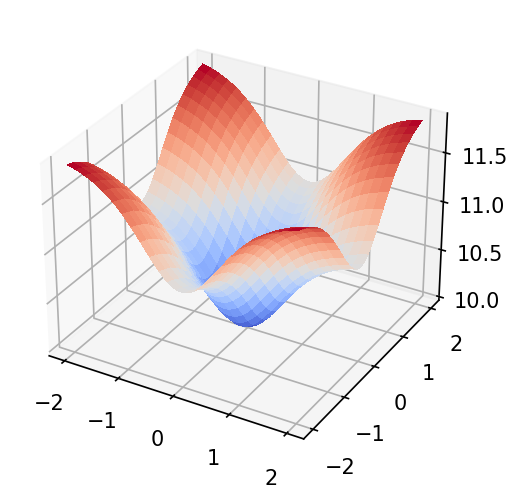

In [3]:
from matplotlib import cm

N = 51
x, y = np.linspace(-2, 2, N), np.linspace(-2, 2, N)
xx, yy = np.meshgrid(x,y)

# define surface 
zz = 10 + np.tanh(xx)**2 + (np.tanh(yy))**2


### your code here
# plot 3D surface



<a list of 8 text.Text objects>

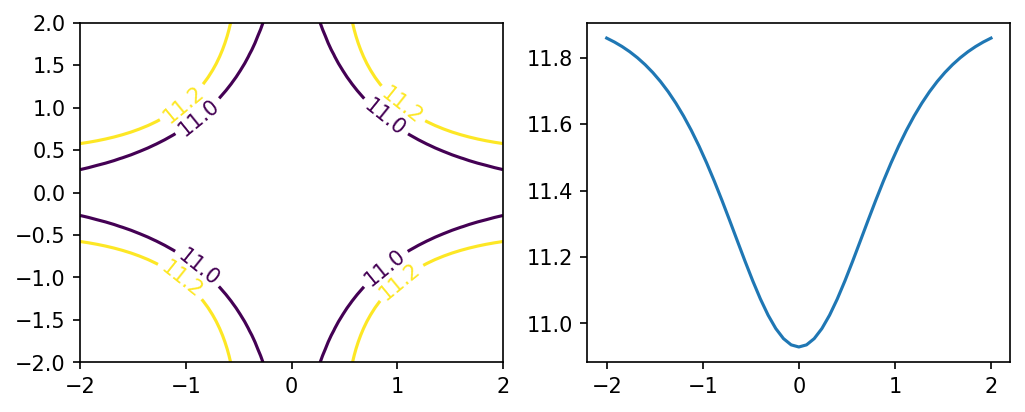

In [6]:
# plot the coutourplot for the slice at the zz = 11.2 and 11.0 (1 point)
# plot slice at the x = 0. Find the global minimum value of the line obtained after slicing zz(x, y) at the x = 0 # (2 points)

#### Task 5. Linear regression (5 points)

Note: https://en.wikipedia.org/wiki/Linear_regression


Given a dataframe with columns "temperature" and "diffusivity". Plot 1/temperature vs. log10(diffusivity). Perfrom a linear regression analysis (1/temperature vs. log10(diffusivity)). Plot the fit line at the same figure. Predict the diffusivity at 300 K. The diffusivity.csv file is provided.

D(T = 300 K) = None cm^2/s


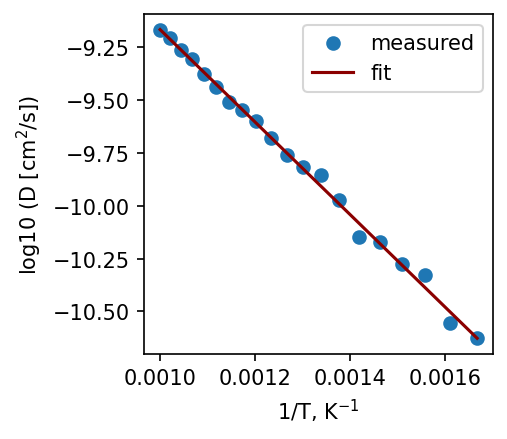

In [39]:
from scipy.stats import linregress
import pandas as pd


D = None # D(T = 300 K)

### your code here ###


#### Task 6: Adjacency matrix (5 points)
Given an .xyz file for acetone molecule

- read the structure using ASE
- plot (or print out) the connectivity matrix (the adjacency matrix) for this molecule.

- use natural cutoffs for extracting nearest neighbors (ase.neighborlist.natural_cutoffs)



In [116]:
file = 'data/Acetone.xyz'


#### your solution ####

#### HW1 pt.2: Vanadium phosphates

- (5 points) Download the crystal structures of vanadium phosphates deposited at The Materials project database using its API
- (5 points) Decorate crystal structures with oxidation states using pymatgen's BVAnalyzer. Discard structures for which BVAnalyzer does not work.

- (10 points) Obtain a pandas dataframe with the following columns: ['min_VO_bond_length', 'vanadium_oxidation_state', 'effective_coordination_number'] for the downloaded compounds

- (5 points) Plot the distribution of the minimum V-O distances for each oxidation state of V. Compare your results with the literature.
    - https://link.springer.com/article/10.1134/S1063774509020059

    - https://journals.iucr.org/m/issues/2020/04/00/lt5028/

- (5 points) Plot the distribution of effective coordination number of V for each oxidation state

- (10 points) What is the correlation between the min V-O bond length and oxidation state of V? Perform linear regression analysis. Report parameters of the fitted line.

- (5 points) Your Super Duper AI Crystal Structure Generator has generated a new VOPO4 polymorph (data/VOPO4_new.cif). Is this structure feasible? Answer in the light of the data you have obtained. 


In [42]:
# imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from pymatgen.core import Structure
from pymatgen.analysis.local_env import VoronoiNN
from mp_api.client import MPRester
from pymatgen.analysis.bond_valence import BVAnalyzer

In [43]:
# Download structures

# https://api.materialsproject.org/docs#/Summary/search_summary__get
api_key = 'HbSHn48X1CSvBzRa4DOX5E9rhb5Tcc03'
with MPRester(api_key) as mpr:
    
    docs = mpr.materials.summary.search(

    ### your code ####                              
)

Problem loading MPContribs client: __init__() got an unexpected keyword argument 'session'


Retrieving SummaryDoc documents:   0%|          | 0/102 [00:00<?, ?it/s]

In [44]:
# Decorate structures with oxidation states
def get_oxi_state_decorated_structure(st):

    """
    This function decorates a pymatgen's Structure
    with oxidation states

    Params
    ------
    st: pymatgen's Structure

    Returns
    -------
    st_decorated: decorated Structure 
    """

    #### your code ####



structures = []
for doc in docs:
    try:
        structures.append(get_oxi_state_decorated_structure(doc.structure))
    except:
        pass

In [46]:
def _effective_coordination_number(face_areas):
    """
    This function calculated effective coordination number

    Params
    ------
    face_areas: numpy array
        face areas of the Voronoi polyhedron
    
    Returns

    effective coordination number 
    defined as the square of the sum of the face areas divided by the sum of the squares of the face areas
    
    """
    
    #### your code here ####




# Calculate CN and bond distances
data = {
            'min_VO_bond_length': [],
            'mean_VO_bond_length': [],
            'vanadium_oxidation_state': [],
            'coordination_number': [],
            'effective_coordination_number': [],
        }


def get_features(poly_data):


    """
    This function calculates geomtrical features
    associated with the VOreonoi polyhedron

    Params
    ------
    poly_data: dictionary 
        The data is derrived using Voronoi partitioning as implemented
        in pymatgen's VoronoiNN.get_voronoi_polyhedra method
        

    Returns
    -------
    minimum V-O distance, mean V-O distance, coordination number, effective coordination_number
    """
    
    distances = [] # you need to collect only V-O distances
    face_areas = [] 
    for site_id in poly_data.keys():
        #### your code ####


    return np.min(distances), np.mean(distances), len(distances), effective_coordination_number



for st in structures:
    for i, site in enumerate(st.sites):
        
        symbol = str(site.specie.element)
        oxi_state = site.specie.oxi_state

        ### your code ###

        # use VoronoiNN to calculate the poly_data 
        # use poly_data to calculate features
        # store data in the pd.DataFrame
        

,min_VO_bond_length,mean_VO_bond_length,vanadium_oxidation_state,coordination_number,effective_coordination_number
0,1.660474,1.918145,4,6,5.940403
1,1.660474,1.918145,4,6,5.940403
2,1.977692,2.002983,3,6,5.996389
3,1.977692,2.002983,3,6,5.996389
4,1.966649,1.999286,3,6,5.994352
...,...,...,...,...,...
457,1.665927,2.101606,5,7,5.894345
458,1.665927,2.101606,5,7,5.894345
459,1.660943,1.920969,5,6,5.908918
460,1.660943,1.920969,5,6,5.908918


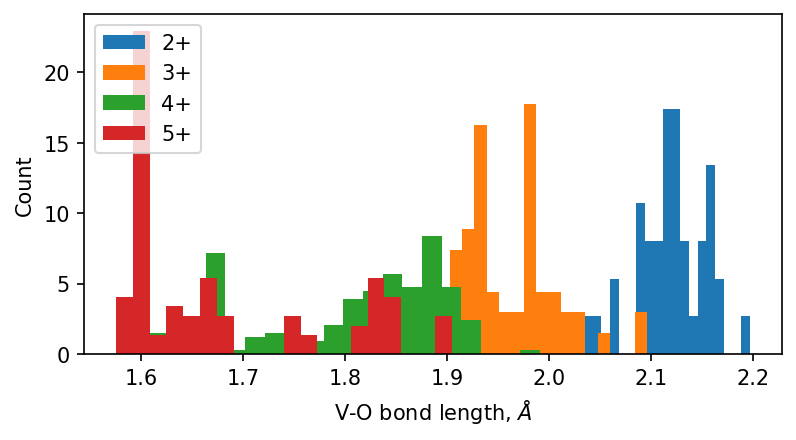

Text(0.5, 0, 'effective CN')

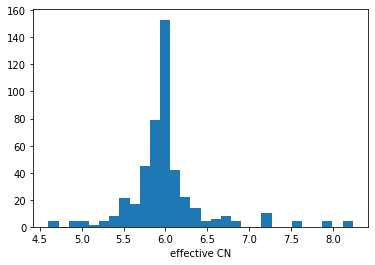

LinregressResult(slope=-0.14709113367040605, intercept=2.404522809252396, rvalue=-0.8882069825501598, pvalue=1.7715102679031334e-157, stderr=0.003547525576533476, intercept_stderr=0.013176818898471427)


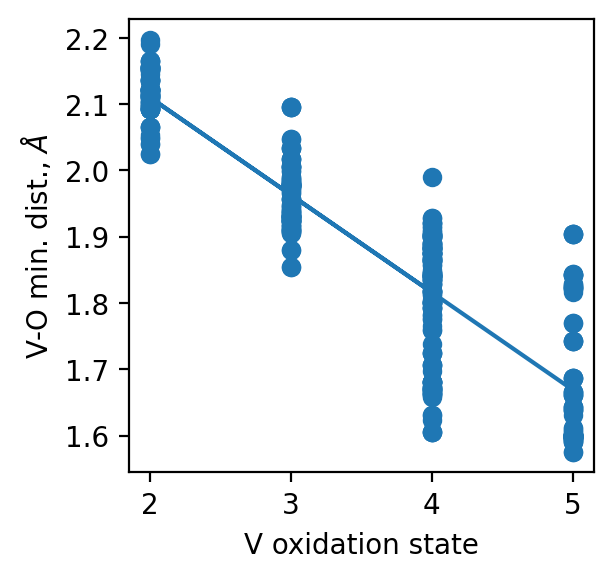